<a href="https://colab.research.google.com/github/Panda-Ani/Income_Prediction/blob/main/Income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
py.offline.init_notebook_mode(connected=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_census = pd.read_csv("/content/drive/MyDrive/Adult/Actual_Adult.csv")

In [ ]:
df_census.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
df_census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [ ]:
# As . was creating issues with the function
df_census.rename(columns={"Native_country": "native_country"}, inplace=True)
df_census.rename(columns={"Education_num": "education_num"}, inplace=True)
df_census.rename(columns={"Marital_status": "marital_status"}, inplace=True)
df_census.rename(columns={"Capital_gain": "capital_gain"}, inplace=True)
df_census.rename(columns={"Capital_loss": "capital_loss"}, inplace=True)
df_census.rename(columns={"Hours_per_week": "hours_week"}, inplace=True)

In [ ]:
df_census['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df_census['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df_census.loc[df_census.Workclass == '?']

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,Occupation,Relationship,Race,Sex,capital_gain,capital_loss,hours_week,native_country,Income


In [ ]:
df_census.loc[df_census.native_country =='?']

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,Occupation,Relationship,Race,Sex,capital_gain,capital_loss,hours_week,native_country,Income


In [ ]:
df_census['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
# We can use different impuation like mean imputation/ KNN imputer.
# But data is large so lets exclude it we will eliminate its biasness to single variable
df_census.drop(df_census[df_census['native_country'] == '?'].index, inplace = True)
df_census.drop(df_census[df_census['Occupation'] == '?'].index, inplace = True)
df_census.drop(df_census[df_census['Workclass'] == '?'].index, inplace = True)

In [ ]:
#checking if it worked
df_census['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<Axes: >

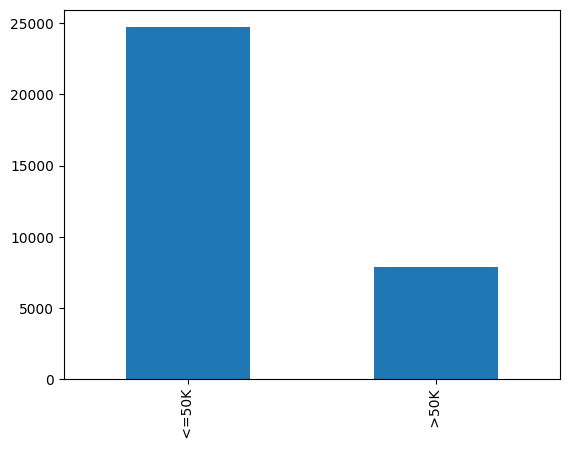

In [ ]:
df_census['Income'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

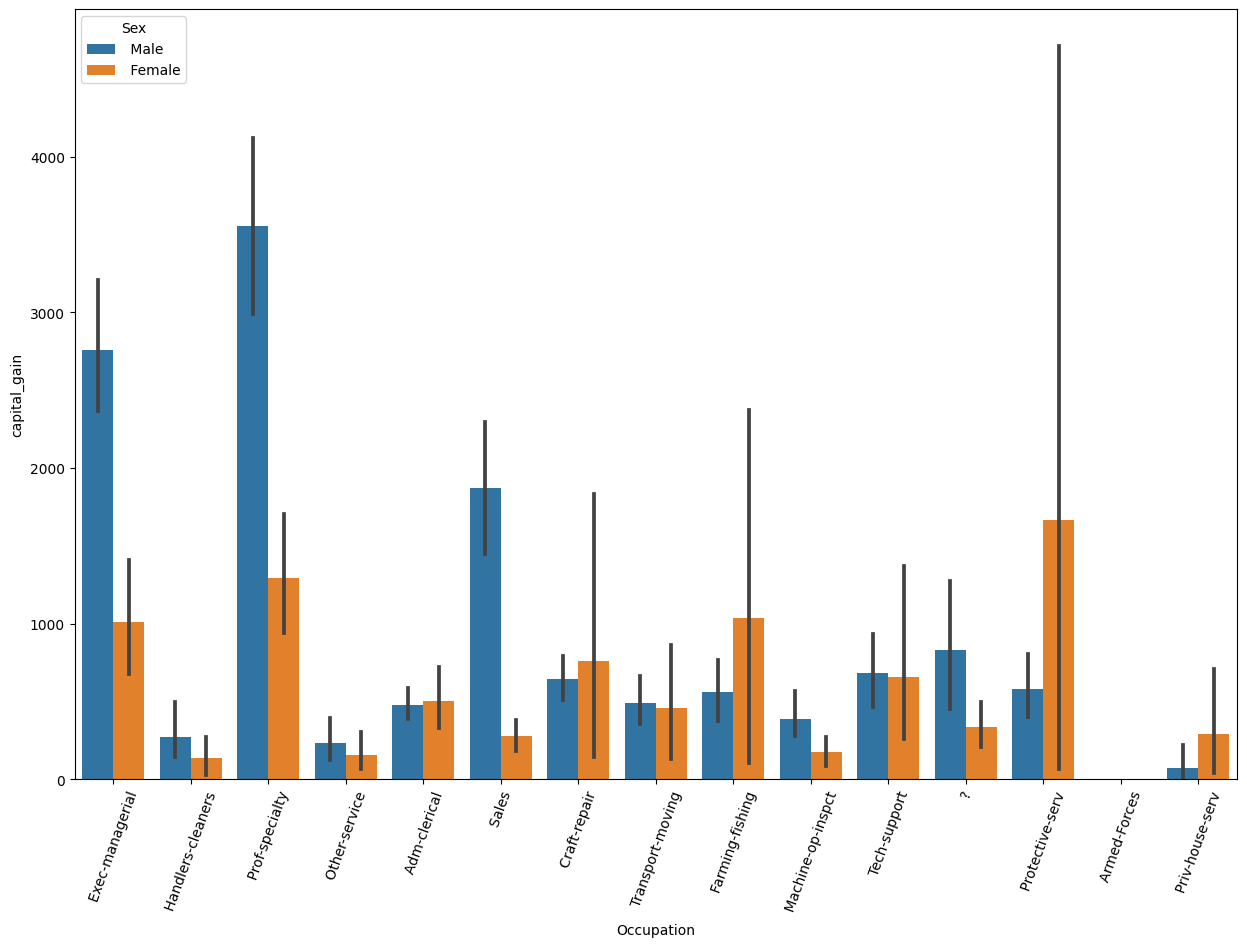

In [ ]:
#checking the distribution of capital_gain and occupation as per gender
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation', y='capital_gain', data=df_census,hue='Sex')
plt.xticks(rotation=70)

<Axes: xlabel='Education', ylabel='hours_week'>

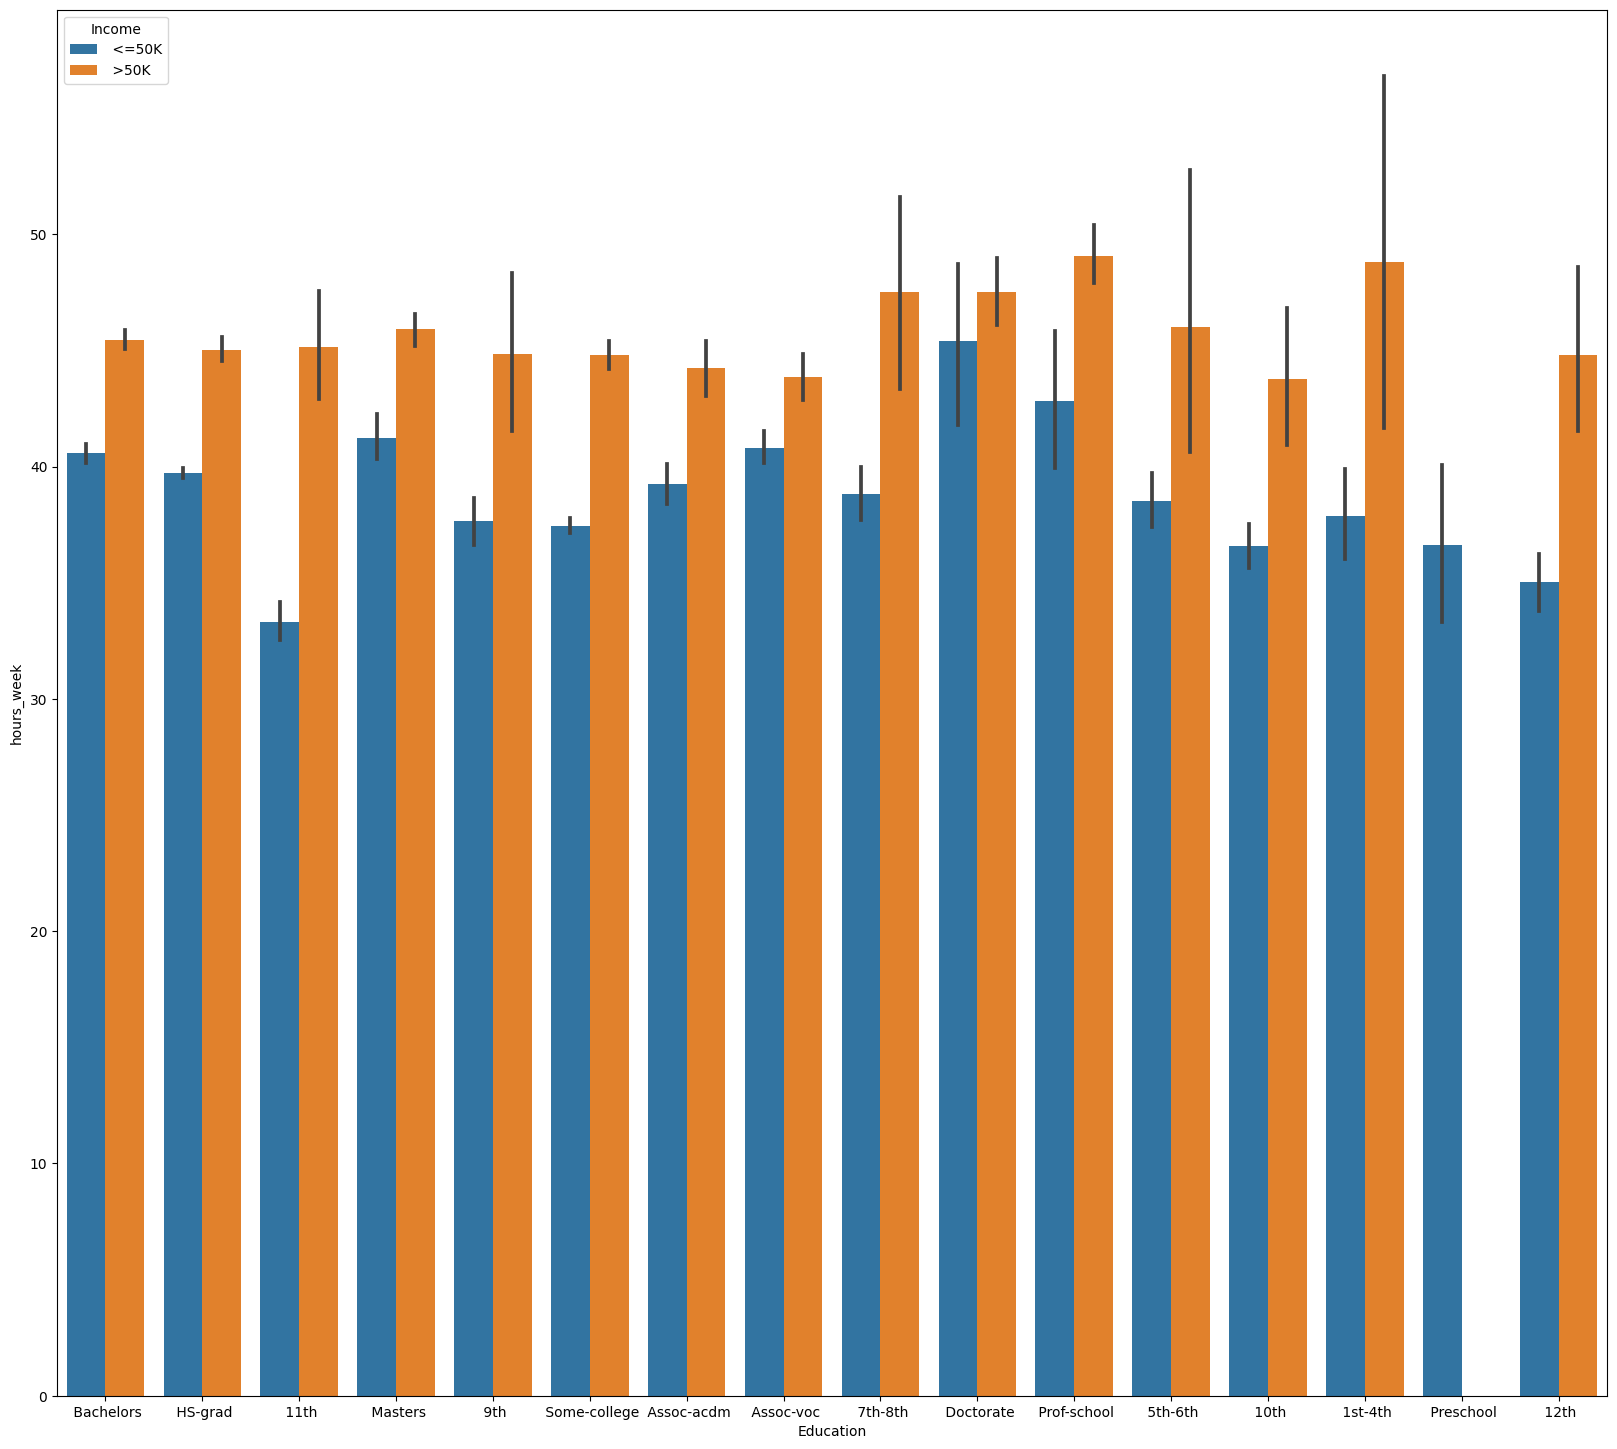

In [ ]:
# Checking the distribution of education and hours_per_week as income
plt.figure(figsize=(20,18))
sns.barplot(x='Education', y='hours_week', data = df_census,hue='Income')

In [ ]:
# converting the column into binary
le = LabelEncoder()

df_census['Income']=le.fit_transform(df_census['Income'])
df_census['Sex']=le.fit_transform(df_census['Sex'])

df_census = pd.get_dummies(df_census,drop_first=True)
#display all columns
pd.set_option('display.max_columns',100)

In [ ]:
df_census.head()

,Age,Fnlwgt,education_num,Sex,capital_gain,capital_loss,hours_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Using standard scaler for age, fnlwgt, education_num, hours_per_week
scaler = StandardScaler()

train_col_scale = df_census[['Age','Fnlwgt','education_num','hours_week']]

train_scaler_col = scaler.fit_transform(train_col_scale)

train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_scale.columns)

df_census['Age'] = train_scaler_col['Age']
df_census['Fnlwgt'] = train_scaler_col['Fnlwgt']
df_census['education_num'] = train_scaler_col['education_num']
df_census['hours_week'] = train_scaler_col['hours_week']
# Now the four features are scaled and we are ready to build model

In [ ]:
#Model Building and Saving

In [ ]:
x = df_census.drop(['Income'],axis=1)
y = df_census['Income']

In [ ]:
# dividing the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 11)

In [ ]:
# Model building
lr = LogisticRegression(multi_class='multinomial', n_jobs=-1)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
svm = SVC()
gdboost = GradientBoostingClassifier()
xgboost = XGBClassifier()

print("Model is created :)")

Model is created :)


In [ ]:
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
xgboost.fit(x_train,y_train)

print("Trained :)")

Trained :)


In [ ]:
# Checking the accuracy

print("Lr classification score", lr.score(x_train,y_train))
print("Knn classification score", knn.score(x_train,y_train))
print("dt classification score", dt.score(x_train,y_train))
print("rf classification score", rf.score(x_train,y_train))
print("adb classification score", adb.score(x_train,y_train))
print("svm classification score", svm.score(x_train,y_train))
print("Gdboost classification score", gdboost.score(x_train,y_train))
print("Xgboost classification score", xgboost.score(x_train,y_train))

Lr classification score 0.8432783432783433
Knn classification score 0.897990522990523
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8585907335907336
svm classification score 0.8015531765531766
Gdboost classification score 0.8683748683748683
Xgboost classification score 0.9067655317655318


In [ ]:
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)
xgboost_yprad = xgboost.predict(x_test)

In [ ]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[6900  512]
 [ 947 1409]]


In [ ]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for Knn_model",'\n',knn_conf_mat)

confusion matrix for Knn_model 
 [[6762  650]
 [ 744 1612]]


In [ ]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[6462  950]
 [ 883 1473]]


In [ ]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for rf_model",'\n',rf_conf_mat)

confusion matrix for rf_model 
 [[6871  541]
 [ 865 1491]]


In [ ]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for adb_model",'\n',adb_conf_mat)

confusion matrix for adb_model 
 [[6938  474]
 [ 867 1489]]


In [ ]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[7182  230]
 [1683  673]]


In [ ]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[7037  375]
 [ 898 1458]]


In [ ]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[6950  462]
 [ 745 1611]]


In [ ]:
# Checking classification report for each models

lr_report = classification_report(y_test,lr_yprad)
print("lr classification_report",'\n',lr_report)

lr classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7412
           1       0.73      0.60      0.66      2356

    accuracy                           0.85      9768
   macro avg       0.81      0.76      0.78      9768
weighted avg       0.84      0.85      0.85      9768



In [ ]:
knn_report = classification_report(y_test,knn_yprad)
print("knn classification_report",'\n',knn_report)

knn classification_report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      7412
           1       0.71      0.68      0.70      2356

    accuracy                           0.86      9768
   macro avg       0.81      0.80      0.80      9768
weighted avg       0.86      0.86      0.86      9768



In [ ]:
dt_report = classification_report(y_test,dt_yprad)
print("dt classification_report",'\n',dt_report)

dt classification_report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7412
           1       0.61      0.63      0.62      2356

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.75      9768
weighted avg       0.81      0.81      0.81      9768



In [ ]:
rf_report = classification_report(y_test,rf_yprad)
print("rf classification_report",'\n',rf_report)

rf classification_report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7412
           1       0.73      0.63      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768



In [ ]:
adb_report = classification_report(y_test,adb_yprad)
print("adb classification_report",'\n',adb_report)

adb classification_report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      7412
           1       0.76      0.63      0.69      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



In [ ]:
svm_report = classification_report(y_test,svm_yprad)
print("svm classification_report",'\n',svm_report)

svm classification_report 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      7412
           1       0.75      0.29      0.41      2356

    accuracy                           0.80      9768
   macro avg       0.78      0.63      0.65      9768
weighted avg       0.79      0.80      0.77      9768



In [ ]:
gdboost_report = classification_report(y_test,gdboost_yprad)
print("gdboost classification_report",'\n',gdboost_report)

gdboost classification_report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.80      0.62      0.70      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.81      9768
weighted avg       0.86      0.87      0.86      9768



In [ ]:
xgboost_report = classification_report(y_test,xgboost_yprad)
print("Xgboost classification_report",'\n',xgboost_report)

Xgboost classification_report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7412
           1       0.78      0.68      0.73      2356

    accuracy                           0.88      9768
   macro avg       0.84      0.81      0.82      9768
weighted avg       0.87      0.88      0.87      9768



In [ ]:
# 3 models gave F1 score above 90%
# In order to check if our model is overfitted we are checking cross validation

In [ ]:
# ROC AUC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay

print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))
print(roc_auc_score(y_test,xgboost.predict(x_test)))

0.7644851830235373
0.7982574488027949
0.7485208449199526
0.7799312728315575
0.7840265224016117
0.6273114446632222
0.7841259344503522
0.8107273617691497


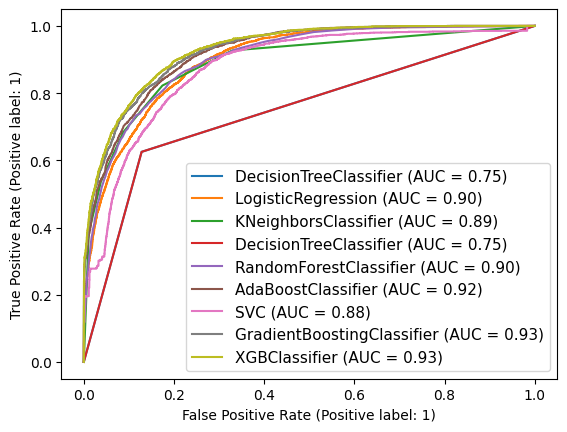

In [ ]:
# Finding roc curve to check best fitted model

disp = RocCurveDisplay.from_estimator(dt,x_test,y_test)
RocCurveDisplay.from_estimator(lr,x_test,y_test,ax=disp.ax_)#here ax_ for axis with confusion matrics
RocCurveDisplay.from_estimator(knn,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(dt,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(adb,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(svm,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(gdboost,x_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(xgboost,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')

In [ ]:
# Here also adaboost, Xgboost and gdboost gives the best results

In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold, cross_val_score

k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [ ]:
print("Mean of Cross validation score for adaboost model" "=>",cross_val_score(adb,x,y,cv=5).mean())
print("Mean of Cross validation score for gdboost model" "=>",cross_val_score(gdboost,x,y,cv=5).mean())
print("Mean of Cross validation score for xgboost model" "=>",cross_val_score(xgboost,x,y,cv=5).mean())

Mean of Cross validation score for adaboost model=> 0.860995085995086
Mean of Cross validation score for gdboost model=> 0.8658169533169533
Mean of Cross validation score for xgboost model=> 0.871468058968059


In [ ]:
# Hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

xgboost.get_params().keys() # to check parameters

parm_grid = {'max_depth' : [3,4],
             'subsample' : [0.5,0.8],
             'learning_rate': [0.1],
             'min_child_weight': [1,2],
             'random_state': [4,5]}

# parm_grid
# {
#     'max_depth' : [3,4],
#     'subsample' : [0.5,0.8],
#     'learning rate': [0.1],
#     'min_child_weight': [1,2],
#     'random_state': [4,5]}

#giving above parameters to our model and behalf of this will train it again

gridsearch = GridSearchCV(estimator=xgboost, param_grid=parm_grid, scoring='accuracy', cv=5)

# fit model using given parameters

gridsearch.fit(x_train,y_train)

#training the model now

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'min_child_weight': [1, 2], 'random_state': [4, 5],
                         'subsample': [0.5, 0.8]},
             scoring='accuracy')

In [ ]:
# Printing best parameters
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'random_state': 4,
 'subsample': 0.8}

In [ ]:
from numpy import nan

In [ ]:
xgboost_tuning= XGBClassifier(learning_rate=0.1, max_depth = 4, min_child_weight=2, random_state=4, subsample=0.8)

#supplying best parameters to our model
xgboost_tuning.fit(x_train,y_train)
#train the model
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing= nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, )
#predicting the values using test data
xgboost_tuning_yprad = xgboost_tuning.predict(x_test)

# printing the classification report

xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print("xgboost classification_report", '\n', xgboost_report)

xgboost classification_report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.79      0.65      0.71      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.80      0.82      9768
weighted avg       0.87      0.87      0.87      9768



In [ ]:
# Saving Model

import pickle

Census_model = 'Census_model.pickle'
pickle.dump(xgboost_tuning,open(Census_model,'wb'))